#Boosting
##-순차적으로 트리를 만들어 이전 트리로부터 더 나은 트리를 만들어내는 알고리즘
##-트리모델 기반으로 한 최신 알고리즘
##-랜덤 포레스트를 능가하는 빠른 속도와 높은 예측력을 보여줌
##-XGBoost, LightGBM, CatBoost

#XGBoost
##- eXtreme Gradient Boost
##- 가장 먼저 개발됨
##- 가장 널리 활용됨
##- 손실함수뿐만 아니라 모형 복잡도까지 고려함
##- 이전 트리의 결과를 다음 트리에 반영해 연속성 있는 트리를 만들어 분류하는 알고리즘

#장점
##- 예측속도가 상당히 빠름
##- 예측력이 좋음
##- 변수 종류가 많고 데이터가 클수록 상대적으로 뛰어난 성능을 보임

#단점
##- 복잡한 모델인만큼, 해석에 어려움이 있음
##- 더 나은 성능을 위한 하이퍼파라미터 튜닝이 까다로움

#유용한 곳
##1. 다양한 데이터 모두 사용 가능
##- 종속변수가 연속형 데이터, 범주형 데이터인 경우 모두 사용 가능함
##2. 거의 모든 상황에 활용 가능
##- 이미지나 자연어가 아닌 표로 정리된 정형데이터의 경우, 거의 모든 상황에 활용할 수 있음

#XGBoost
##- 부스팅 기법의 하나임
##- 각 트리가 독립적인 랜덤 포레스트와 달리 이전 트리를 기반으로 새로운 트리를 생성
##- 2차 도함수 활용과 정규화 하이퍼파라미터 지원이라는 특징을 지님



#1단계 : 문제 정의
#2단계 : 라이브러리 및 데이터 불러오기
#3단계 : 전처리
##ㄴ데이터 클리닝
##ㄴ피처 엔지니어링
#4단계 : 모델링 및 예측하기
#5단계 : 이해하기 : 경사하강법
#6단계 : 하이퍼파라미터 튜닝 : 그리드 서치
#7단계 : 중요변수 확인

#예측목표 : 스피드 데이팅 데이터셋을 이용해서 커플 성사 여부를 예측
#알고리즘 : XGBoost
#데이터 셋 : speeddating.csv
#종속변수 : match(커플성사여부)
#문제유형 : 분류
#평가지표 : 정확도, 혼동 행렬, 분류 리포트

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub
import pandas as pd
import os

# 1. 데이터셋 다운로드
path = kagglehub.dataset_download("polarbearyap/speed-dating")

print("Path to dataset files:", path)

# 2. 다운로드된 경로 확인
print("Path to dataset files:", path)

# 3. 파일 목록 확인
print("Files in directory:", os.listdir(path))

Path to dataset files: /kaggle/input/speed-dating
Path to dataset files: /kaggle/input/speed-dating
Files in directory: ['speeddating.csv']


In [ ]:
# 4. CSV 파일 읽기
csv_file = os.path.join(path, "speeddating.csv")
df = pd.read_csv(csv_file, encoding='latin1')  # 이 데이터는 latin1로 인코딩된 경우가 많음

# 5. 데이터 출력
df.head()

<ipython-input-7-6b2830e2670b>:3: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file, encoding='latin1')  # 이 데이터는 latin1로 인코딩된 경우가 많음


,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1


In [ ]:
pd.options.display.max_columns = 40

In [ ]:
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,35,20,20,20,0,...,[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,60,0,0,40,0,...,[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3,2,4,[0-4],[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,2,4,[2-5],[2-5],Law,19,18,19,18,14,...,[9-10],[9-10],[6-8],[0-5],0.16,[0-0.33],3,2,4,[0-4],[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,2,4,[2-5],[2-5],Law,30,5,15,40,5,...,[9-10],[9-10],[6-8],[0-5],0.61,[0.33-1],3,2,4,[0-4],[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,2,4,[2-5],[2-5],Law,30,10,20,10,10,...,[9-10],[9-10],[6-8],[0-5],0.21,[0-0.33],3,2,4,[0-4],[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 123 entries, has_null to match
dtypes: int64(7), object(116)
memory usage: 7.9+ MB


In [ ]:
df.info(verbose=True)  # 모든 칼럼 출력
#df.info(max_cols=200)  # 모든 칼럼 출력하고 싶을 때 충분히 큰 수로 설정

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Dtype 
---   ------                           ----- 
 0    has_null                         int64 
 1    wave                             int64 
 2    gender                           object
 3    age                              object
 4    age_o                            object
 5    d_age                            int64 
 6    d_d_age                          object
 7    race                             object
 8    race_o                           object
 9    samerace                         int64 
 10   importance_same_race             object
 11   importance_same_religion         object
 12   d_importance_same_race           object
 13   d_importance_same_religion       object
 14   field                            object
 15   pref_o_attractive                object
 16   pref_o_sincere                   object
 17   pref_o_intel

In [ ]:
# 1. 복사본 만들기
df_copy = df.copy()

# 2. 특정 열 인덱스 리스트 만들기
column_indices = [0, 2, 3, 4, 7, 8, 10, 11, 15, 16, 17, 18, 19, 20,
                  27, 28, 29, 30, 31, 32,
                  39, 40, 41, 42, 43, 44,
                  61, 62, 63, 64, 65, 66,
                  107, 109, 110, 115, 116, 119, 122]

# 3. 열 인덱스로 선택
data = df_copy.iloc[:, column_indices]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   has_null                       8378 non-null   int64 
 1   gender                         8378 non-null   object
 2   age                            8378 non-null   object
 3   age_o                          8378 non-null   object
 4   race                           8378 non-null   object
 5   race_o                         8378 non-null   object
 6   importance_same_race           8378 non-null   object
 7   importance_same_religion       8378 non-null   object
 8   pref_o_attractive              8378 non-null   object
 9   pref_o_sincere                 8378 non-null   object
 10  pref_o_intelligence            8378 non-null   object
 11  pref_o_funny                   8378 non-null   object
 12  pref_o_ambitious               8378 non-null   object
 13  pre

In [ ]:
round(data.describe(include = 'all'),2)

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378,8378.00
unique,NaN,2,31,25,6,6,18,16,102,85,72,78,88,86,19,15,18,18,16,16,102,84,69,77,87,91,18,15,18,17,16,16,250,17,19,19,20,8,NaN
top,NaN,male,27,27,European/Caucasian-American,European/Caucasian-American,1,1,20,20,20,20,10,10,6,8,8,7,7,5,20,20,20,20,10,10,6,8,8,7,7,5,?,5,?,7,5,0,NaN
freq,NaN,4194,1037,1059,4727,4722,2754,2944,1613,2184,2653,2164,1937,2001,1655,2045,2198,1657,1679,1462,1627,2181,2573,2149,1977,1981,1658,2046,2199,1657,1681,1465,158,2001,6578,1816,1799,7644,NaN
mean,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16
std,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37
min,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
25%,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
50%,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
75%,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [ ]:
data.isna().mean()
#결측치 없음.. 있다고 가정하고 전처리
#트리 모델은 결측치 처리가 쉽다
#결측치 값들끼리 분류가 가능하기 때문(-99로 채우기 -> -99는 결측치로 분류) -> 분석에서 제외 가능

,0
has_null,0.0
gender,0.0
age,0.0
age_o,0.0
race,0.0
race_o,0.0
importance_same_race,0.0
importance_same_religion,0.0
pref_o_attractive,0.0
pref_o_sincere,0.0


In [ ]:
data = data.replace('?',np.nan)
#결측치(NaN) 대신 ?로 채워진 데이터가 존재한다..
#?로 채워진 데이터는 NaN으로 처리

In [ ]:
data.isna().mean()

,0
has_null,0.000000
gender,0.000000
age,0.011339
age_o,0.012413
race,0.007520
race_o,0.008713
importance_same_race,0.009429
importance_same_religion,0.009429
pref_o_attractive,0.010623
pref_o_sincere,0.010623


In [ ]:
data = data.dropna(subset=['pref_o_attractive','pref_o_sincere','pref_o_intelligence','pref_o_funny','pref_o_ambitious','pref_o_shared_interests',
                           'attractive_important','sincere_important','intellicence_important','funny_important','ambtition_important','shared_interests_important'])

In [ ]:
data = data.fillna(-99)

#트리 모델의 진화 과정
##결정 트리 : 가장 기본적인 트리 모델
##배깅 : 부트스트랩 훈련셋을 사용하는 트리 모델
##랜덤 포레스트 : 데이터와 변수의 일부를 사용하여 여러 트리를 만드는 모델
##부스팅 : 이전 트리의 학습 내용을 다음 트리에 반영하여 여러 트리를 만드는 방법
##경사하강법 : 부스팅에 경사 하강법을 적용한 모델
##XG포레스트 : 경사 부스팅에서 계산 속도와 알고리즘 효율을 개선한 모델

#배깅 :
##- 부트스트랩 훈련셋을 사용하는 트리 모델
#부트스트랩 :
##- 데이터의 일부분을 무작위로 반복 추출하는 방법
##- 추출한 데이터의 여러 부분집합을 사용해 여러 트리를 만들어 오버피팅을 방지함
#랜덤포레스트 :
##- 배깅에서 한 단계 발전된 모델

#Adaptive Boosting(에이다부스트)
##- 단계적으로 트리를 만들 때 이전 단계에서의 분류 결과에 따라 각 데이터에 가중치를 부여/수정함
##- 관련 예)
##- 이전 트리에서 가중치가 덜 부여되고 잘못 분류된 데이터들에 더 높은 가중치를 부여함
##- 후속 트리에서는 가중치가 높은 데이터를 분류하는 데 우선순위를 둠

#경사부스팅
##- 경사하강법을 이용하여 이전 모델의 에러를 기반으로 다음 트리를 만듦
##- XGboost, LightGBM, Catboost

#Boosting
##- 랜덤 포레스트에서 그 다음 세대로 진화하게 되는 중요한 개념
##- 랜덤 포레스트에서는 각각의 트리를 독립적으로, 즉 서로 관련 없이 만듦

#Boosting Algorithm
##- 부스팅 알고리즘에서는 트리를 순차적으로 만들면서 이전 트리에서 학습한 내용이 다음 트리를 만들 때 반영됨

In [ ]:
data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21,27,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,35,20,20,20,0,5,6,8,8,8,8,6,15,20,20,15,15,15,6,9,7,7,6,5,0.14,3,2,7,6,0,0
1,0,female,21,22,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,60,0,0,40,0,0,7,8,10,7,7,5,15,20,20,15,15,15,7,8,7,8,5,6,0.54,3,2,7,5,1,0
2,1,female,21,22,'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',2,4,19,18,19,18,14,12,10,10,10,10,10,10,15,20,20,15,15,15,5,8,9,8,5,7,0.16,3,2,7,-99,1,1
3,0,female,21,23,'Asian/Pacific Islander/Asian-American',European/Caucasian-American,2,4,30,5,15,40,5,5,7,8,9,8,9,8,15,20,20,15,15,15,7,6,8,7,6,8,0.61,3,2,7,6,0,1
4,0,female,21,24,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',2,4,30,10,20,10,10,20,8,7,9,6,9,7,15,20,20,15,15,15,5,6,7,7,6,6,0.21,3,2,6,6,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8130 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   has_null                       8130 non-null   int64 
 1   gender                         8130 non-null   object
 2   age                            8130 non-null   object
 3   age_o                          8130 non-null   object
 4   race                           8130 non-null   object
 5   race_o                         8130 non-null   object
 6   importance_same_race           8130 non-null   object
 7   importance_same_religion       8130 non-null   object
 8   pref_o_attractive              8130 non-null   object
 9   pref_o_sincere                 8130 non-null   object
 10  pref_o_intelligence            8130 non-null   object
 11  pref_o_funny                   8130 non-null   object
 12  pref_o_ambitious               8130 non-null   object
 13  pref_o_s

In [ ]:
# 4번(인덱스 3), 5번(인덱스 4) 제외한 2~37번 컬럼 인덱스 추출
cols_to_convert = [i for i in range(2, 38) if i not in [4, 5]]

# 해당 인덱스에 해당하는 컬럼 이름 추출
columns = data.columns[cols_to_convert]

# 선택한 컬럼들만 float64로 변환
data[columns] = data[columns].astype('float64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8130 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8130 non-null   int64  
 1   gender                         8130 non-null   object 
 2   age                            8130 non-null   float64
 3   age_o                          8130 non-null   float64
 4   race                           8130 non-null   object 
 5   race_o                         8130 non-null   object 
 6   importance_same_race           8130 non-null   float64
 7   importance_same_religion       8130 non-null   float64
 8   pref_o_attractive              8130 non-null   float64
 9   pref_o_sincere                 8130 non-null   float64
 10  pref_o_intelligence            8130 non-null   float64
 11  pref_o_funny                   8130 non-null   float64
 12  pref_o_ambitious               8130 non-null   float6

In [ ]:
def age_gap(x):
  if x['age'] == -99:
    return -99
  elif x['age_o'] == -99:
    return -99
  elif x['gender'] == 'female':#남자가 연상이면 양수, 여자가 연상이면 음수 값이 나오도록
    return x['age_o'] - x['age']
  else:
    return x['age'] - x['age_o']

In [ ]:
data['age_gap'] = data.apply(age_gap, axis = 1)

In [ ]:
data['age_gap_abs'] = abs(data['age_gap'])#나이차이 절댓값
#나이차이 자체가 중요한 변수일 수 있기 때문

In [ ]:
def same_race(x):
  if x['race'] == -99:
    return -99
  elif x['race_o'] == -99:
    return -99
  elif x['race'] == x['race_o']:#상대방과 인종이 같으면
    return 1
  else:
    return -1

In [ ]:
data['same_race'] = data.apply(same_race, axis = 1)

In [ ]:
def same_race_point(x):
  if x['same_race'] == -99:
    return -99
  else:
    return x['same_race'] * x['importance_same_race']

In [ ]:
#결과값이 0인 경우 원인을 파악하기 어려움
data['same_race_point'] = data.apply(same_race_point, axis=1)

In [ ]:
#중요도와 평가 점수가 곱해져야 온전한 평가가 이루어질 수 있다
#외모를 중요시 봄, 잘생김 -> 중요도 90 * 잘생김 90
def rating(data, importance, score):
  if data[importance] == -99:
    return -99
  elif data[score] == -99:
    return -99
  else:
    return data[importance] * data[score]

In [ ]:
data.columns[8:14]

Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')

In [ ]:
partner_imp = data.columns[8:14]
partner_rate_me = data.columns[14:20]
my_imp = data.columns[20:25]
my_rate_partner = data.columns[26:32]


In [ ]:
new_label_partner = ['attractive_p','sincere_partner_p','intelligence_p','funny_p','ambitious_p','shared_interets_p']
new_label_me = ['attractive_m','sincerer_partner_m','intelligence_m','funny_m','ambition_m','shared_interests_m']

In [ ]:
for i,j,k in zip(new_label_partner, partner_imp, partner_rate_me):
  print(i,' & ', j ,' & ',k)

attractive_p  &  pref_o_attractive  &  attractive_o
sincere_partner_p  &  pref_o_sincere  &  sinsere_o
intelligence_p  &  pref_o_intelligence  &  intelligence_o
funny_p  &  pref_o_funny  &  funny_o
ambitious_p  &  pref_o_ambitious  &  ambitous_o
shared_interets_p  &  pref_o_shared_interests  &  shared_interests_o


In [ ]:
for i,j,k in zip(new_label_partner, partner_imp, partner_rate_me):
  data[i] = data.apply(lambda x: rating(x, j, k), axis=1)

In [ ]:
data = pd.get_dummies(data,columns = ['gender','race','race_o'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('match',axis = 1), data['match'], test_size = 0.2, random_state = 100)

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier(n_estimators = 500, max_depth = 5, random_state = 100)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,pred)

0.8690036900369004

In [ ]:
print(confusion_matrix(y_test,pred))

[[1298   67]
 [ 146  115]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.63      0.44      0.52       261

    accuracy                           0.87      1626
   macro avg       0.77      0.70      0.72      1626
weighted avg       0.86      0.87      0.86      1626



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'learning_rate':[0.01,0,1,0.3],
    'max_depth':[5,7,10],
    'subsample':[0.5,0.7,1],
    'n_estimators':[300,500,1000]
}

In [ ]:
model = xgb.XGBClassifier()

In [ ]:
gs_model = GridSearchCV(model, parameters, n_jobs=-1,scoring='f1',cv=5)

In [ ]:
gs_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0, 1, 0.3],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [300, 500, 1000],
                         'subsample': [0.5, 0.7, 1]},
             scoring='f1')

In [ ]:
gs_model.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 1}

In [ ]:
accuracy_score(y_test,pred)

0.8690036900369004

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.63      0.44      0.52       261

    accuracy                           0.87      1626
   macro avg       0.77      0.70      0.72      1626
weighted avg       0.86      0.87      0.86      1626



In [ ]:
xgb.XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators = 1000, subsample = 0.5, random_state = 100)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model.feature_importances_#어떤 변수가 중요했나(영향이 있나)

array([0.01150455, 0.01116018, 0.01237161, 0.01143087, 0.01314681,
       0.01400401, 0.01152107, 0.01898269, 0.01386502, 0.01332316,
       0.01574686, 0.0796241 , 0.01289081, 0.01032292, 0.04605618,
       0.01545623, 0.03038256, 0.01795361, 0.01239796, 0.01917753,
       0.01345882, 0.01435351, 0.01287299, 0.03318752, 0.00932073,
       0.00950693, 0.0373072 , 0.01615658, 0.01559207, 0.01143771,
       0.00971526, 0.01475748, 0.104465  , 0.02535486, 0.01276074,
       0.01182721, 0.0155316 , 0.00731477, 0.01253815, 0.01372362,
       0.01356002, 0.01393305, 0.01580132, 0.01152543, 0.01117706,
       0.02278249, 0.02051092, 0.01564551, 0.01886999, 0.01575211,
       0.01454736, 0.01006452, 0.01485688, 0.00847185], dtype=float32)

In [ ]:
features_imp = pd.DataFrame({'features':X_train.columns, 'values':model.feature_importances_})

In [ ]:
features_imp.head()

,features,values
0,has_null,0.011505
1,age,0.011160
2,age_o,0.012372
3,importance_same_race,0.011431
4,importance_same_religion,0.013147


<Axes: xlabel='values', ylabel='features'>

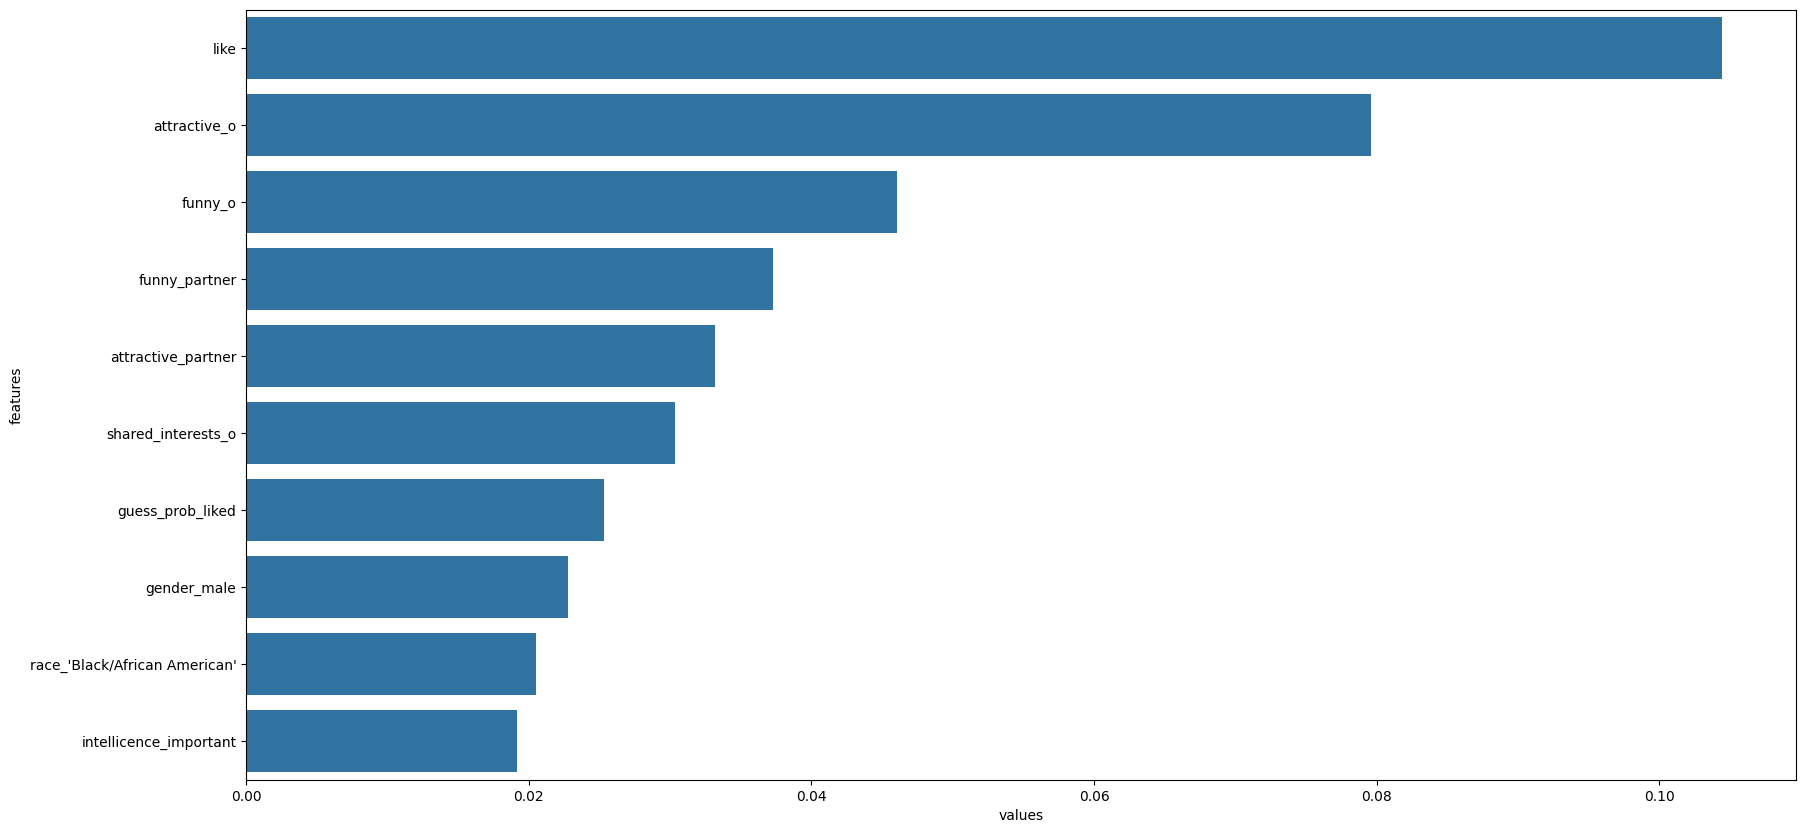

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x='values',y='features',data = features_imp.sort_values(by='values',ascending=False).head(10))#어떻게 영향을 주었는지는 알 수 없다

#정확도는 약 86% 나왔으나 종속변수 match(성사율)의 평균값이 16%였다는 점에서 나머지 84%가 매칭되지 않았다는 것을 고려할 때, 크게 우수한 성능이라고 보기는 어렵다

#혼동행렬
##TP : 양성을 양성으로 판단 : 111
##FN : 양성을 음성으로 판단 : 150
##FP : 음성을 양성으로 판단 : 62
##TN : 음성을 음성으로 판단 : 1303

#정밀도(Precision)
##- 1로 예측한 경우, 얼마만큼이 실제로 1인지를 나타냄
##- TP/(TP+FP) = 양성을 양성으로 판단/(양성을 양성으로 판단 + 1종 오류) = 양성을 양성으로 판단 / 양성으로 판단한 수
##- FP가 커질수록 분모가 커지므로, 정밀도는 낮아짐
##- 1종 오류와 관련됨

#재현율(Recall)
##- 실제로 1 중에, 얼마만큼을 1로 예측했는지를 나타냄
##- TP / (TP + FN) = 양성을 양성으로 판단 / (양성을 양성으로 판단 + 2종 오류) = 양성을 양성으로 판단 / 실제 양성인 수
##- FN이 커질수록 recall 값이 작아짐
##- 2종 오류와 연관됨

#F1-점수(F1-score)
##- 정밀도와 재현율의 조화평균
##- 2 * (precision*recall)/(precision+recall) = 2 * (정밀도*재현율)/(정밀도+재현율)
##- 정밀도와 재현율이 높을 때 함께 높아지며, 둘의 값이 비슷할수록 더 높은 값을 보임
##- 1종 오류가 중요하다면 정밀도에, 2종 오류가 중요하다면 재현율에 더욱 신경써야 함
##- 특별히 더 중요한 오류 유형이 없다면 F1-점수를 검토하는 것이 무난함

#경사하강법
##- 경사 부스팅의 핵심 개념 중 하나로, 모델이 어떻게 최소 오차가 되는 매개변수들을 학습하는지에 대한 방법론
##- 오차식에 대한 미분계수를 통해 매개변수의 이동 방향과 보폭을 결정함
##- 보폭은 learning rate라는 하이퍼파라미터로 조절할 수 있음

#1단계 : 문제 정의
##- 스페드 데이팅 데이셋으로 남녀의 커플 성사를 예측하는 문제
#2단계 : 라이브러리 및 데이터 불러오기
##- 판다스, 넘파이, 맷플롯립, 시본 라이브러리를 임포트
##- 프로젝트에 쓸 예제 데이터셋 불러옴
#3단계 : 전처리
##ㄴ데이터 클리닝
##- 변수 특성을 고려하여, 결측치가 있는 변수 일부를 데이터에서 제거
##ㄴ피처 엔지니어링
##- 나이, 인종, '중요하게 생각하는 특성'등을 반영하는 추가 변수 생성
#4단계 : 모델링 및 예측하기 / 평가하기
##- XGBoost로 모델링한 결과 86% 정확도를 얻었으나 F1-score는 0.49로 낮았음
#5단계 : 이해하기 : 경사하강법
#6단계 : 하이퍼파라미터 튜닝 : 그리드 서치
##- 그리드 서치를 사용해 최적의 하이퍼파라미터 조합을 찾아 적용하기
##- F1-score가 아주 조금 상승
#7단계 : 중요변수 확인(Feature Importance)
##- 어떤 변수가 더 중요하게 작용했는지 확인해 보았음(영향도의 방향성은 알 수 없었음)